# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ltspice
import subprocess
import os
plt.rc('font', size=11)

# SSH Hamiltonian Definition

In [2]:
def SSH_Hamiltonian(t1, t2, Nunit=5):
    # t1<t2 ==> Non-trivial mode and vice versa
    D_mat = np.array(
        [
            [0, -t1],
            [-t1, 0],
        ],
        dtype="complex",
    )
    OffD_mat = np.array([[0, 0], [-t2, 0]], dtype="complex")
    OffD_mat_T = np.transpose(np.conj(OffD_mat))
    H = (
        np.kron(np.diag(np.ones(Nunit)), D_mat)
        + np.kron(np.diag(np.ones(Nunit - 1), 1), OffD_mat)
        + np.kron(np.diag(np.ones(Nunit - 1), -1), OffD_mat_T)
    )
    return H

def SSH_Hamiltonian_onsite(t1, t2, e=0, Nunit=5):
    # t1<t2 ==> Non-trivial mode and vice versa
    D_mat = np.array(
        [
            [e, -t1],
            [-t1, e],
        ],
        dtype="complex",
    )
    OffD_mat = np.array([[0, 0], [-t2, 0]], dtype="complex")
    OffD_mat_T = np.transpose(np.conj(OffD_mat))
    H = (
        np.kron(np.diag(np.ones(Nunit)), D_mat)
        + np.kron(np.diag(np.ones(Nunit - 1), 1), OffD_mat)
        + np.kron(np.diag(np.ones(Nunit - 1), -1), OffD_mat_T)
    )
    return H

# One SSH chain typical

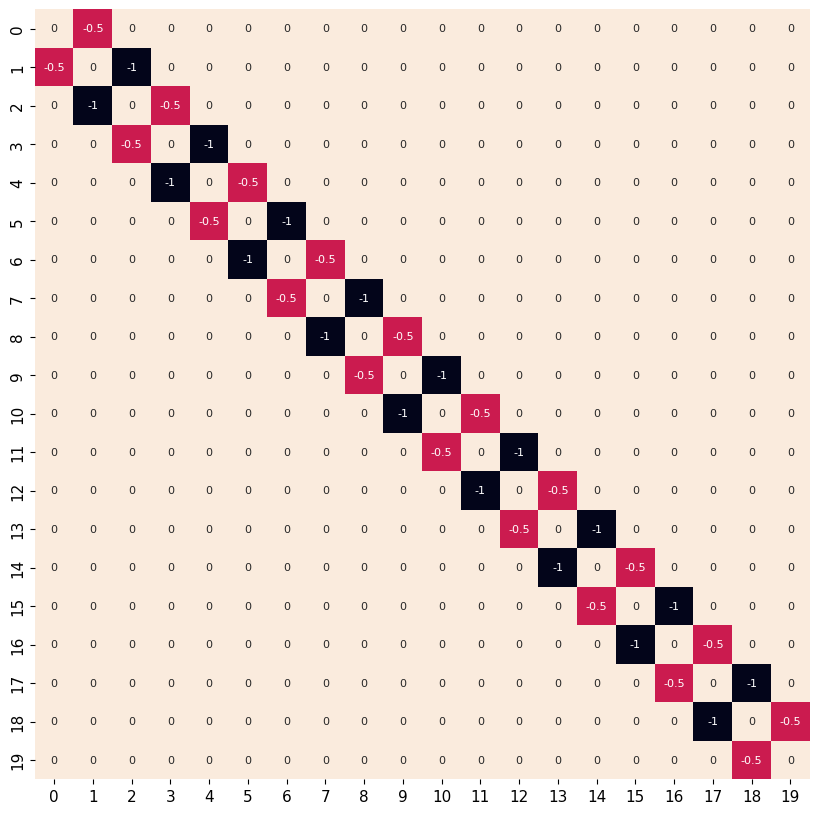

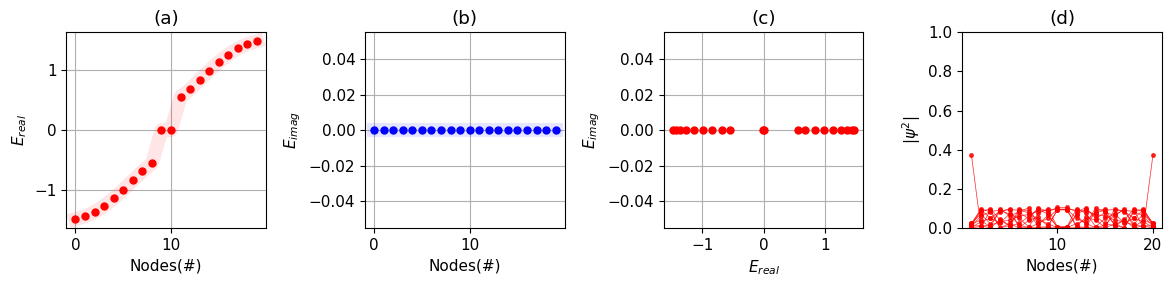

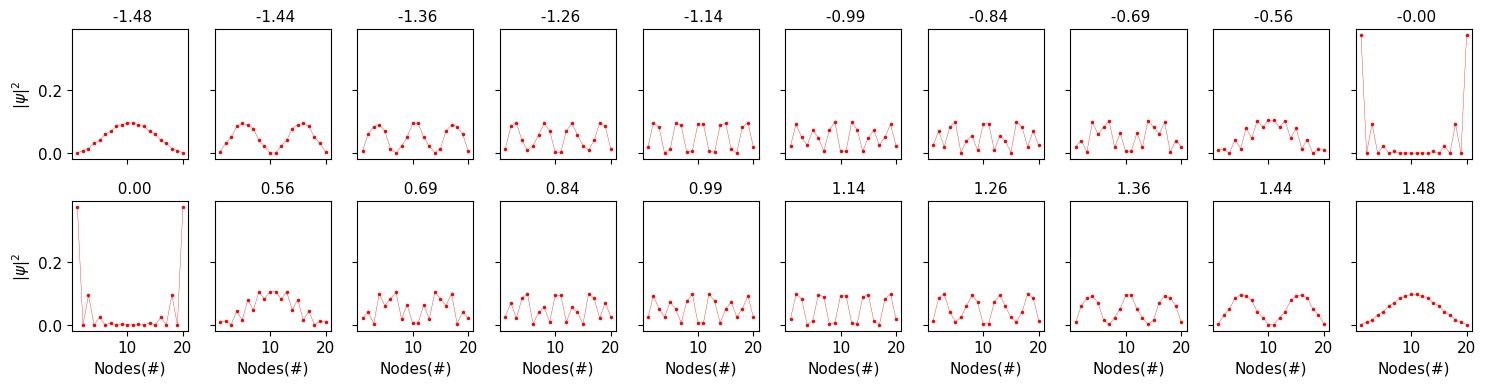

In [6]:
Nunit = 10; Nsub = 2; Nchain = 1
N = Nunit*Nsub
N_nodes = N*Nchain; nodes = np.arange(1, N_nodes+1, 1)
t1 = 0.5; t2 = 1; # t1<t2 ==> Non-trivial mode and vice versa
h1 = SSH_Hamiltonian(0.5, 1, Nunit)
H = (
        np.kron(np.diag(np.array([1])), h1)
    )
# H[N-1, N] = -t2
# H[N, N-1] = -t2
# Plot the heatmap of the matrix with annotations
fig, ax = plt.subplots(1, 1, figsize=(10, 10)); img = sns.heatmap((H.real+H.imag), annot=True, cbar=False, annot_kws={"size": 8})# raise Exception('Abort')
# Eigen Value ans Eigen Vectors
eVal = np.zeros(N_nodes, dtype='complex'); eVec = np.zeros((N_nodes, N_nodes), dtype='complex')
eVal, eVec = np.linalg.eig(H); sorted_indexes = np.argsort(eVal.real); eVal = eVal[sorted_indexes]; eVec = eVec[:, sorted_indexes]
# Plot the results
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].plot(eVal.real, 'ro', ms=5); axs[0].plot(eVal.real, 'r-', lw=10, alpha=.1); axs[0].set_ylabel(r'$E_{real}$'); axs[0].set_xlabel('Nodes(#)'); axs[0].grid(True); axs[0].set_title('(a)')
axs[1].plot(eVal.imag, 'bo', ms=5); axs[1].plot(eVal.imag, 'b-', lw=10, alpha=.1); axs[1].set_ylabel(r'$E_{imag}$'); axs[1].set_xlabel('Nodes(#)'); axs[1].grid(True); axs[1].set_title('(b)')
axs[2].plot(eVal.real, eVal.imag, 'ro', ms=5); axs[2].set_ylabel(r'$E_{imag}$'); axs[2].set_xlabel(r'$E_{real}$'); axs[2].grid(True); axs[2].set_title('(c)')
axs[3].plot(nodes, np.abs(eVec)**2, 'r.-', lw=0.5, ms=5, alpha=0.5); axs[3].set_xlabel('Nodes(#)'); axs[3].set_ylabel(r'$|\psi^2|$'); axs[3].set_ylim([0, 1]); axs[3].set_title('(d)')
fig.tight_layout()
# Plot Eigen Vectors
ncols = 10
nrows = N_nodes // ncols
if N_nodes/ncols > nrows:
    nrows = nrows+1
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*1.5, nrows*2), sharex=True, sharey=True)
for ir in range(nrows):
    for ic in range(ncols):
        iv = ir*ncols+ic
        axs[ir, ic].plot(nodes, eVec[:, iv]**2, 'r.-', lw='0.25', ms=3)
        axs[ir, ic].set_title(' % .2f' % (eVal.real[iv]), fontsize=11)
        if ir == nrows-1:
            axs[ir, ic].set_xlabel('Nodes(#)')
        if iv >= N_nodes-1:
            break
    axs[ir, 0].set_ylabel(r'$|\psi|^2$')
fig.tight_layout()

# One SSH chain lossy
When the whole SSH Chain is lossy in equal magnitude, then ther is no change in typical SSH chain behavior. As long as $t_1<t_2$, we see tological boundary edges

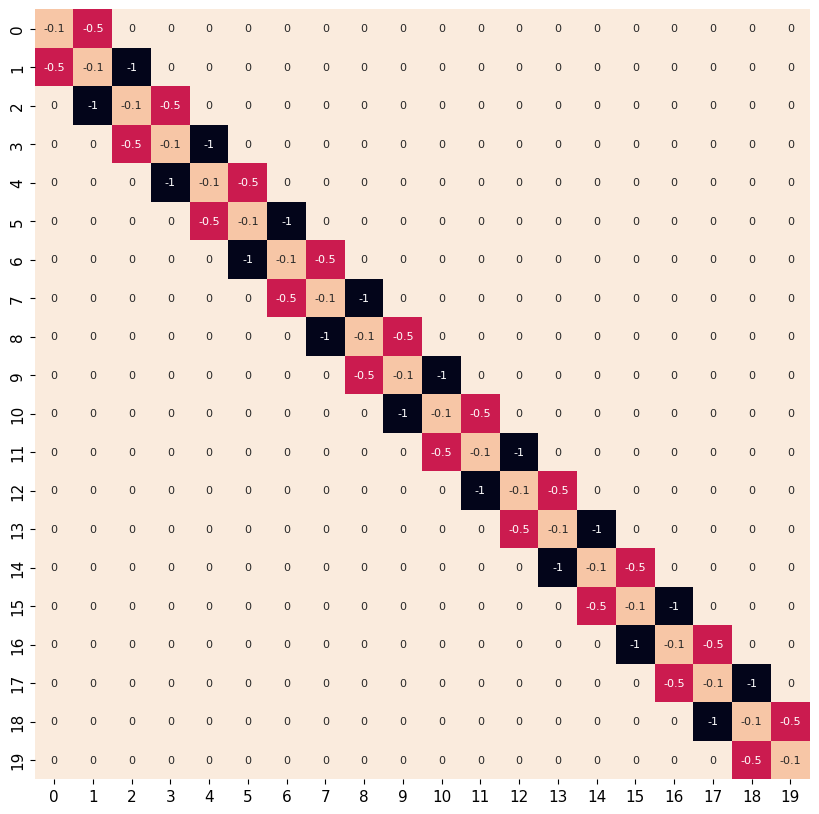

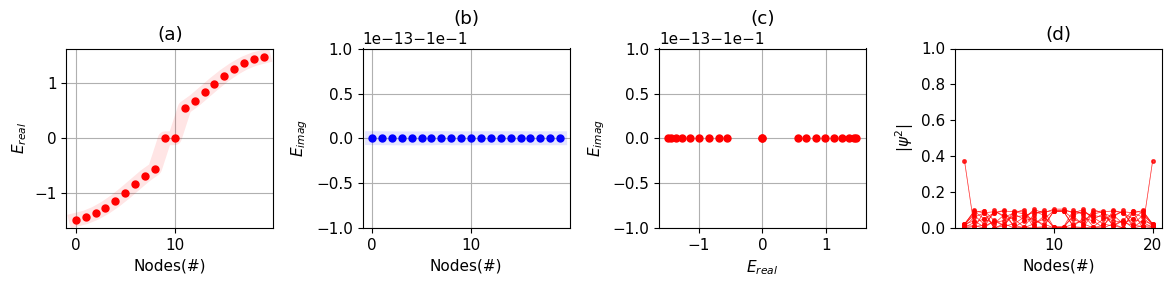

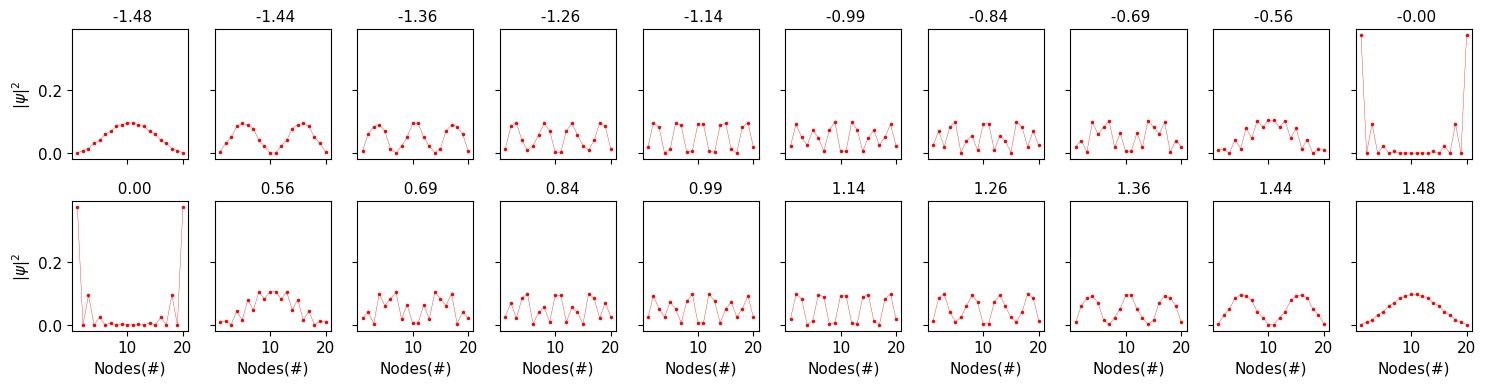

In [7]:
Nunit = 10; Nsub = 2; Nchain = 1
N = Nunit*Nsub
N_nodes = N*Nchain; nodes = np.arange(1, N_nodes+1, 1)
t1 = 0.5; t2 = 1; # t1<t2 ==> Non-trivial mode and vice versa
e = -1j*0.1
h1 = SSH_Hamiltonian_onsite(t1, t2, e, Nunit)
H = (
        np.kron(np.diag(np.array([1])), h1)
    )
# H[N, N-1] = -t2
fig, ax = plt.subplots(1, 1, figsize=(10, 10)); img = sns.heatmap((H.real+H.imag), annot=True, cbar=False, annot_kws={"size": 8})# raise Exception('Abort') 
# Eigen Value ans Eigen Vectors 
eVal = np.zeros(N_nodes, dtype='complex'); eVec = np.zeros((N_nodes, N_nodes), dtype='complex')
eVal, eVec = np.linalg.eig(H); sorted_indexes = np.argsort(eVal.real); eVal = eVal[sorted_indexes]; eVec = eVec[:, sorted_indexes]
# Plot the results 
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].plot(eVal.real, 'ro', ms=5); axs[0].plot(eVal.real, 'r-', lw=10, alpha=.1); axs[0].set_ylabel(r'$E_{real}$'); axs[0].set_xlabel('Nodes(#)'); axs[0].grid(True); axs[0].set_title('(a)')
axs[1].plot(eVal.imag, 'bo', ms=5); axs[1].plot(eVal.imag, 'b-', lw=10, alpha=.1); axs[1].set_ylabel(r'$E_{imag}$'); axs[1].set_xlabel('Nodes(#)'); axs[1].grid(True); axs[1].set_title('(b)')
axs[2].plot(eVal.real, eVal.imag, 'ro', ms=5); axs[2].set_ylabel(r'$E_{imag}$'); axs[2].set_xlabel(r'$E_{real}$'); axs[2].grid(True); axs[2].set_title('(c)')
axs[3].plot(nodes, np.abs(eVec)**2, 'r.-', lw=0.5, ms=5, alpha=0.5); axs[3].set_xlabel('Nodes(#)'); axs[3].set_ylabel(r'$|\psi^2|$'); axs[3].set_ylim([0, 1]); axs[3].set_title('(d)')
fig.tight_layout()
# Plot Eigen Vectors
ncols = 10
nrows = N_nodes // ncols
if N_nodes/ncols > nrows:
    nrows = nrows+1
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*1.5, nrows*2), sharex=True, sharey=True)
for ir in range(nrows):
    for ic in range(ncols):
        iv = ir*ncols+ic
        axs[ir, ic].plot(nodes, eVec[:, iv]**2, 'r.-', lw='0.25', ms=3)
        axs[ir, ic].set_title(' % .2f' % (eVal.real[iv]), fontsize=11)
        if ir == nrows-1:
            axs[ir, ic].set_xlabel('Nodes(#)')
        if iv >= N_nodes-1:
            break
    axs[ir, 0].set_ylabel(r'$|\psi|^2$')
fig.tight_layout()

# One SSH chain alternate lossy-gainy

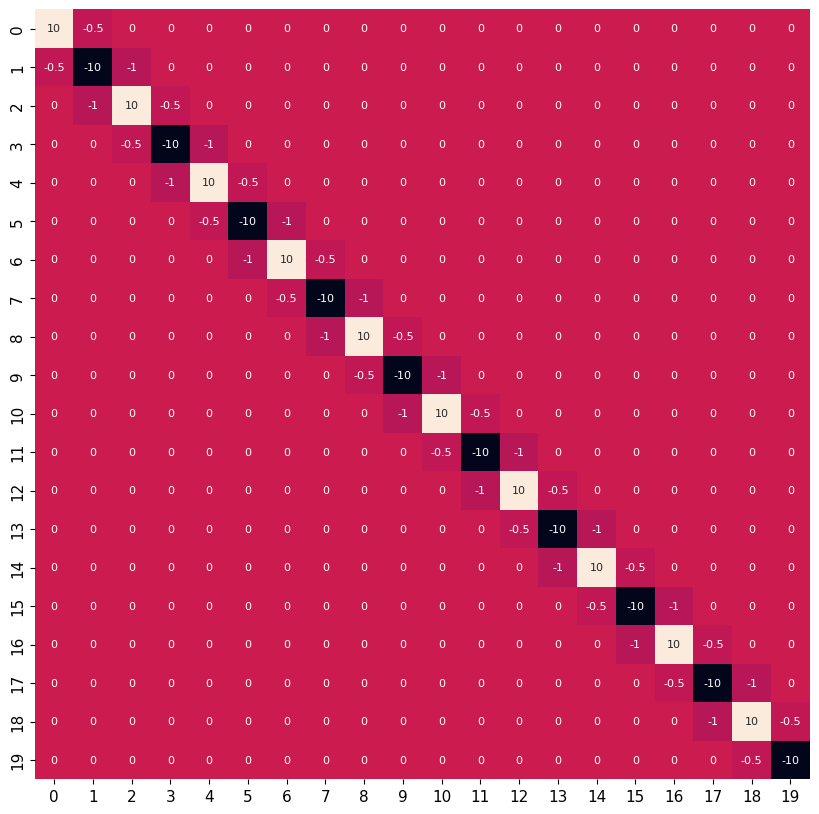

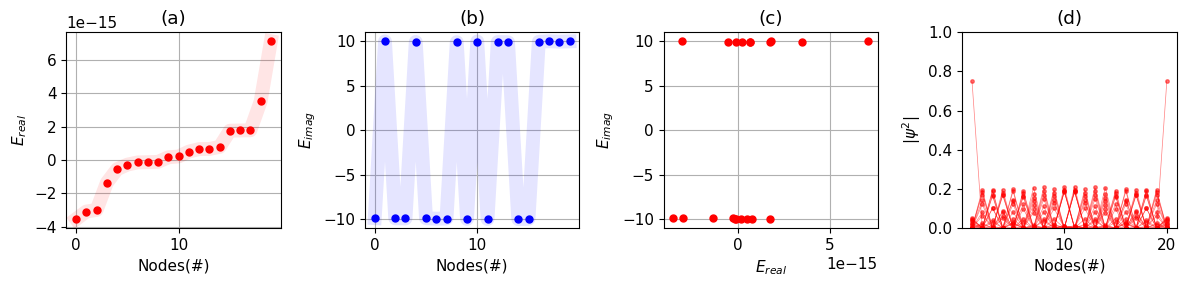

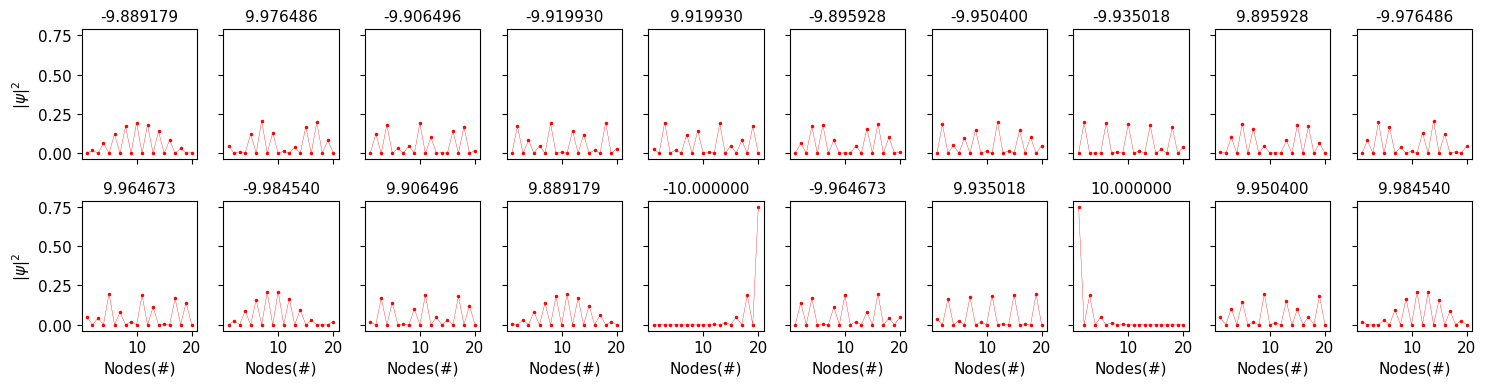

In [8]:
Nunit = 10; Nsub = 2; Nchain = 1
N = Nunit*Nsub
N_nodes = N*Nchain; nodes = np.arange(1, N_nodes+1, 1)
t1 = 0.5; t2 = 1; # t1<t2 ==> Non-trivial mode and vice versa
y = 10
e = -1j*y
h1 = SSH_Hamiltonian_onsite(t1, t2, e, Nunit)
H = (
        np.kron(np.diag(np.array([1])), h1)
    )
for i in range(0, N_nodes, 2):
    H[i, i] = 1j*y
# H[N, N-1] = -t2
fig, ax = plt.subplots(1, 1, figsize=(10, 10)); img = sns.heatmap((H.real+H.imag), annot=True, cbar=False, annot_kws={"size": 8})# raise Exception('Abort') 
# Eigen Value ans Eigen Vectors 
eVal = np.zeros(N_nodes, dtype='complex'); eVec = np.zeros((N_nodes, N_nodes), dtype='complex')
eVal, eVec = np.linalg.eig(H); sorted_indexes = np.argsort(eVal.real); eVal = eVal[sorted_indexes]; eVec = eVec[:, sorted_indexes]
# Plot the results 
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].plot(eVal.real, 'ro', ms=5); axs[0].plot(eVal.real, 'r-', lw=10, alpha=.1); axs[0].set_ylabel(r'$E_{real}$'); axs[0].set_xlabel('Nodes(#)'); axs[0].grid(True); axs[0].set_title('(a)')
axs[1].plot(eVal.imag, 'bo', ms=5); axs[1].plot(eVal.imag, 'b-', lw=10, alpha=.1); axs[1].set_ylabel(r'$E_{imag}$'); axs[1].set_xlabel('Nodes(#)'); axs[1].grid(True); axs[1].set_title('(b)')
axs[2].plot(eVal.real, eVal.imag, 'ro', ms=5); axs[2].set_ylabel(r'$E_{imag}$'); axs[2].set_xlabel(r'$E_{real}$'); axs[2].grid(True); axs[2].set_title('(c)')
axs[3].plot(nodes, np.abs(eVec)**2, 'r.-', lw=0.5, ms=5, alpha=0.5); axs[3].set_xlabel('Nodes(#)'); axs[3].set_ylabel(r'$|\psi^2|$'); axs[3].set_ylim([0, 1]); axs[3].set_title('(d)')
fig.tight_layout()
# Plot Eigen Vectors
ncols = 10
nrows = N_nodes // ncols
if N_nodes/ncols > nrows:
    nrows = nrows+1
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*1.5, nrows*2), sharex=True, sharey=True)
for ir in range(nrows):
    for ic in range(ncols):
        iv = ir*ncols+ic
        axs[ir, ic].plot(nodes, eVec[:, iv]**2, 'r.-', lw='0.25', ms=3)
        axs[ir, ic].set_title('%f' % (eVal.imag[iv]), fontsize=11)
        if ir == nrows-1:
            axs[ir, ic].set_xlabel('Nodes(#)')
        if iv >= N_nodes-1:
            break
    axs[ir, 0].set_ylabel(r'$|\psi|^2$')
fig.tight_layout()

# One SSH chain gradual lossy

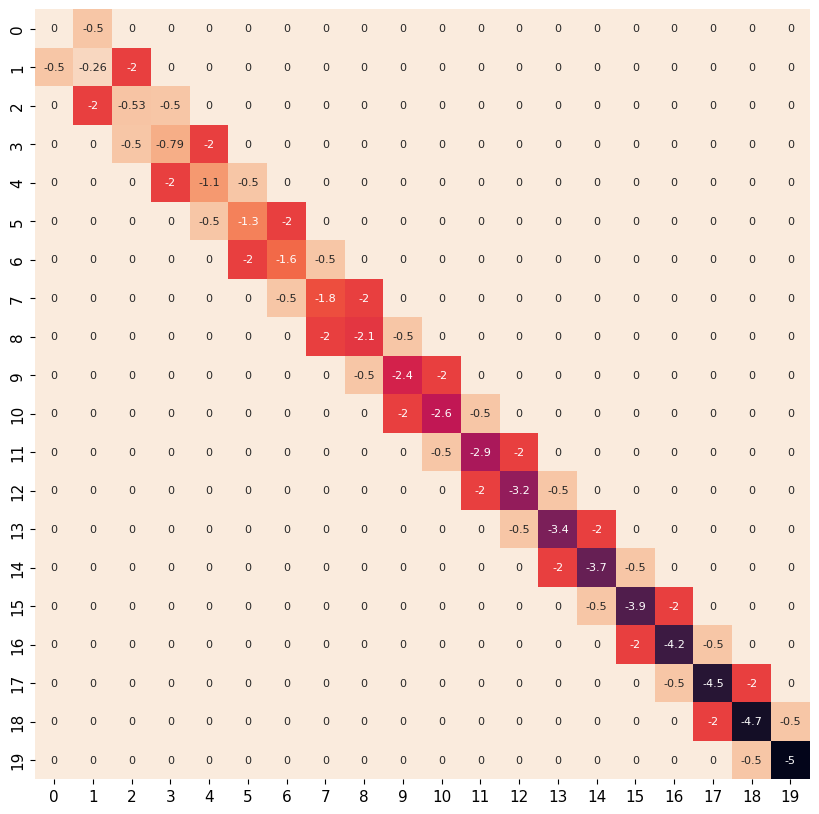

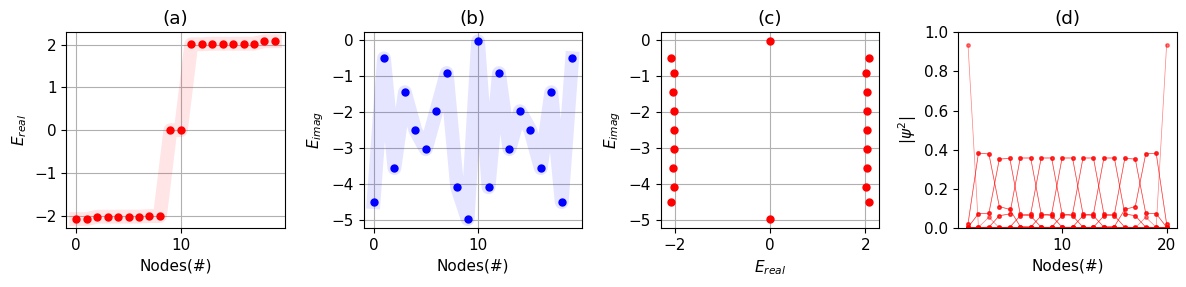

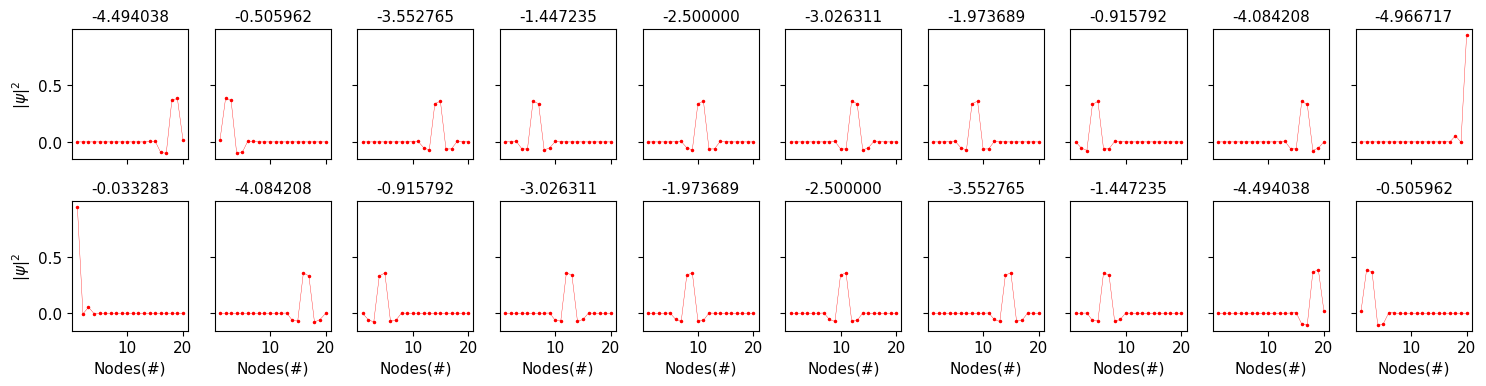

In [9]:
Nunit = 10; Nsub = 2; Nchain = 1
N = Nunit*Nsub
N_nodes = N*Nchain; nodes = np.arange(1, N_nodes+1, 1)
t1 = 0.5; t2 = 2; # t1<t2 ==> Non-trivial mode and vice versa
y1 = 0; yN = 5;
e = -1j*np.linspace(y1, yN, N_nodes)
h1 = SSH_Hamiltonian(t1, t2, Nunit)
H = (
        np.kron(np.diag(np.array([1])), h1)
        + np.diag(e)
    )

fig, ax = plt.subplots(1, 1, figsize=(10, 10)); img = sns.heatmap((H.real+H.imag), annot=True, cbar=False, annot_kws={"size": 8})
# raise Exception('Abort') 
# Eigen Value ans Eigen Vectors 
eVal = np.zeros(N_nodes, dtype='complex'); eVec = np.zeros((N_nodes, N_nodes), dtype='complex'); eVal, eVec = np.linalg.eig(H); sorted_indexes = np.argsort(eVal.real); eVal = eVal[sorted_indexes]; eVec = eVec[:, sorted_indexes]
# Plot the results 
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].plot(eVal.real, 'ro', ms=5); axs[0].plot(eVal.real, 'r-', lw=10, alpha=.1); axs[0].set_ylabel(r'$E_{real}$'); axs[0].set_xlabel('Nodes(#)'); axs[0].grid(True); axs[0].set_title('(a)')
axs[1].plot(eVal.imag, 'bo', ms=5); axs[1].plot(eVal.imag, 'b-', lw=10, alpha=.1); axs[1].set_ylabel(r'$E_{imag}$'); axs[1].set_xlabel('Nodes(#)'); axs[1].grid(True); axs[1].set_title('(b)')
axs[2].plot(eVal.real, eVal.imag, 'ro', ms=5); axs[2].set_ylabel(r'$E_{imag}$'); axs[2].set_xlabel(r'$E_{real}$'); axs[2].grid(True); axs[2].set_title('(c)')
axs[3].plot(nodes, np.abs(eVec)**2, 'r.-', lw=0.5, ms=5, alpha=0.5); axs[3].set_xlabel('Nodes(#)'); axs[3].set_ylabel(r'$|\psi^2|$'); axs[3].set_ylim([0, 1]); axs[3].set_title('(d)')
fig.tight_layout()
# Plot Eigen Vectors
ncols = 10
nrows = N_nodes // ncols
if N_nodes/ncols > nrows:
    nrows = nrows+1
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*1.5, nrows*2), sharex=True, sharey=True)
for ir in range(nrows):
    for ic in range(ncols):
        iv = ir*ncols+ic
        axs[ir, ic].plot(nodes, eVec[:, iv]**2, 'r.-', lw='0.25', ms=3)
        axs[ir, ic].set_title('%f' % (eVal.imag[iv]), fontsize=11)
        if ir == nrows-1:
            axs[ir, ic].set_xlabel('Nodes(#)')
        if iv >= N_nodes-1:
            break
    axs[ir, 0].set_ylabel(r'$|\psi|^2$')
fig.tight_layout()

# One SSH chain gradual lossy-gainy alternatingly

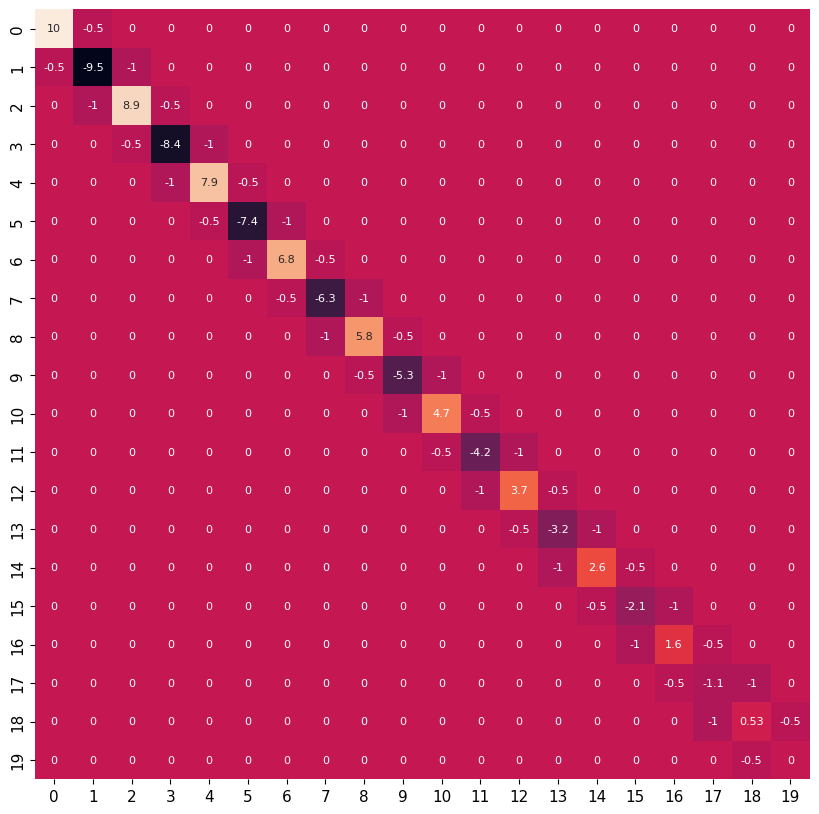

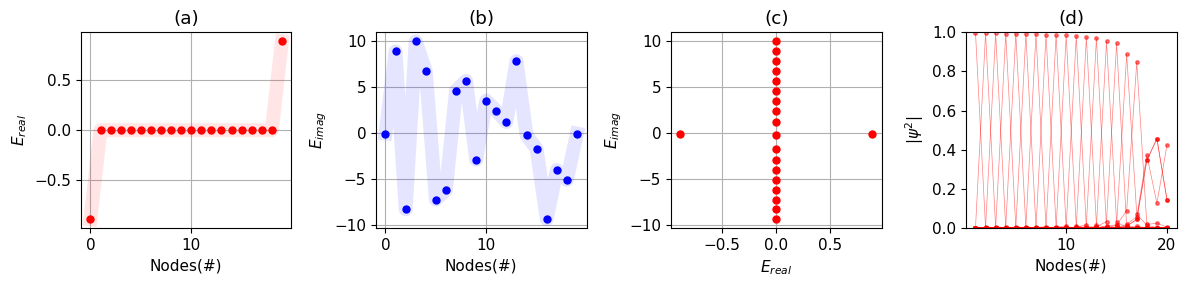

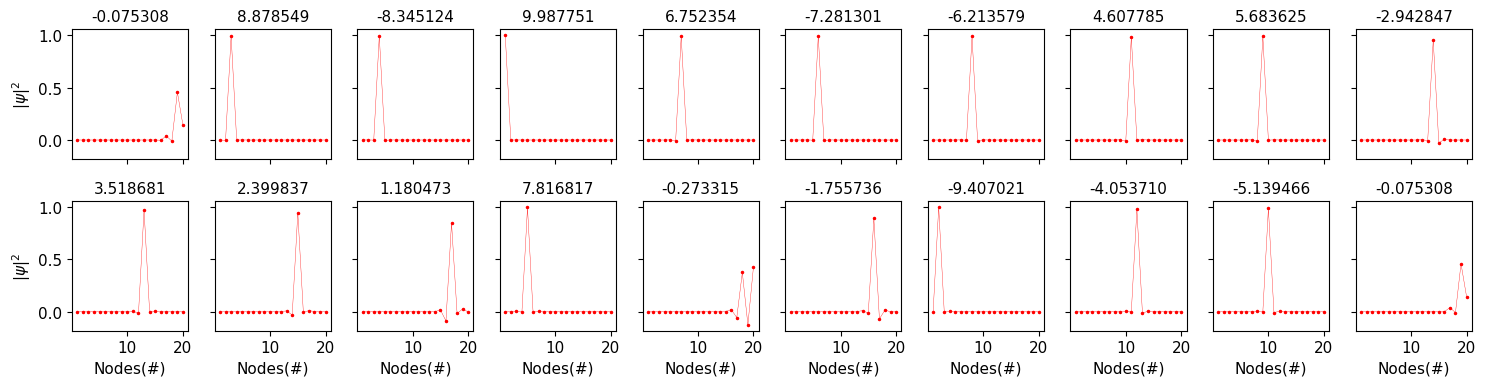

In [10]:
Nunit = 10; Nsub = 2; Nchain = 1
N = Nunit*Nsub
N_nodes = N*Nchain; nodes = np.arange(1, N_nodes+1, 1)
t1 = 0.5; t2 = 1; # t1<t2 ==> Non-trivial mode and vice versa
y1 = 10; yN = 0;
e = -1j*np.linspace(y1, yN, N_nodes)
h1 = SSH_Hamiltonian(t1, t2, Nunit)
H = (
        np.kron(np.diag(np.array([1])), h1)
        + np.diag(e)
    )
for i in range(0, N_nodes, 2):
    H[i, i] = -H[i, i]
fig, ax = plt.subplots(1, 1, figsize=(10, 10)); img = sns.heatmap((H.real+H.imag), annot=True, cbar=False, annot_kws={"size": 8})
# raise Exception('Abort') 
# Eigen Value ans Eigen Vectors 
eVal = np.zeros(N_nodes, dtype='complex'); eVec = np.zeros((N_nodes, N_nodes), dtype='complex'); eVal, eVec = np.linalg.eig(H); sorted_indexes = np.argsort(eVal.real); eVal = eVal[sorted_indexes]; eVec = eVec[:, sorted_indexes]
# Plot the results 
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].plot(eVal.real, 'ro', ms=5); axs[0].plot(eVal.real, 'r-', lw=10, alpha=.1); axs[0].set_ylabel(r'$E_{real}$'); axs[0].set_xlabel('Nodes(#)'); axs[0].grid(True); axs[0].set_title('(a)')
axs[1].plot(eVal.imag, 'bo', ms=5); axs[1].plot(eVal.imag, 'b-', lw=10, alpha=.1); axs[1].set_ylabel(r'$E_{imag}$'); axs[1].set_xlabel('Nodes(#)'); axs[1].grid(True); axs[1].set_title('(b)')
axs[2].plot(eVal.real, eVal.imag, 'ro', ms=5); axs[2].set_ylabel(r'$E_{imag}$'); axs[2].set_xlabel(r'$E_{real}$'); axs[2].grid(True); axs[2].set_title('(c)')
axs[3].plot(nodes, np.abs(eVec)**2, 'r.-', lw=0.5, ms=5, alpha=0.5); axs[3].set_xlabel('Nodes(#)'); axs[3].set_ylabel(r'$|\psi^2|$'); axs[3].set_ylim([0, 1]); axs[3].set_title('(d)')
fig.tight_layout()
# Plot Eigen Vectors
ncols = 10
nrows = N_nodes // ncols
if N_nodes/ncols > nrows:
    nrows = nrows+1
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*1.5, nrows*2), sharex=True, sharey=True)
for ir in range(nrows):
    for ic in range(ncols):
        iv = ir*ncols+ic
        axs[ir, ic].plot(nodes, eVec[:, iv]**2, 'r.-', lw='0.25', ms=3)
        axs[ir, ic].set_title('%f' % (eVal.imag[iv]), fontsize=11)
        if ir == nrows-1:
            axs[ir, ic].set_xlabel('Nodes(#)')
        if iv >= N_nodes-1:
            break
    axs[ir, 0].set_ylabel(r'$|\psi|^2$')
fig.tight_layout()

# Two SSH Chain coupled together

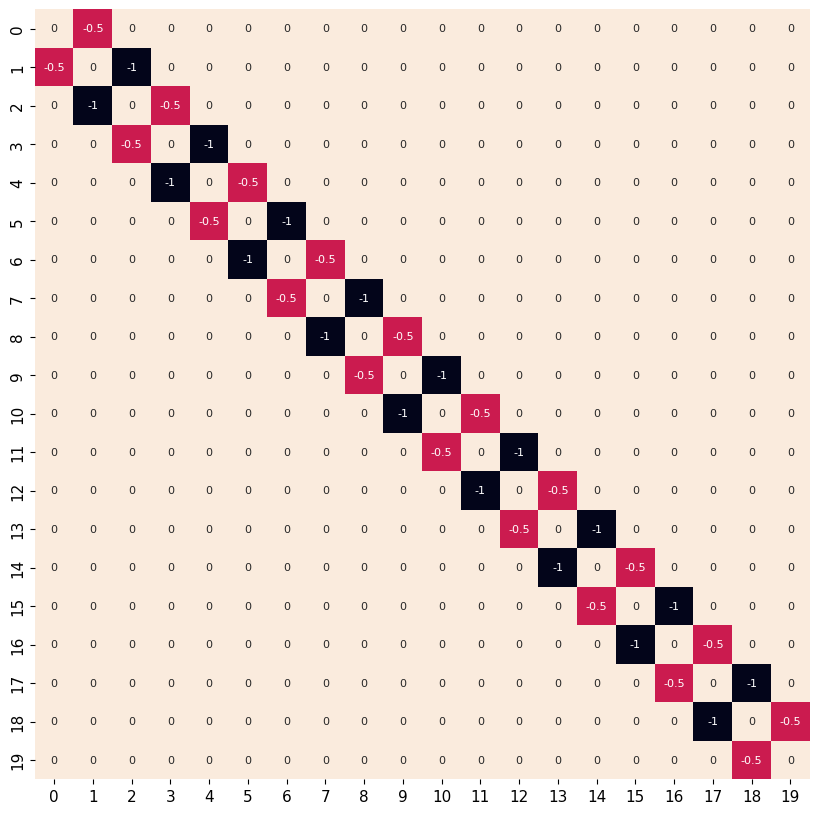

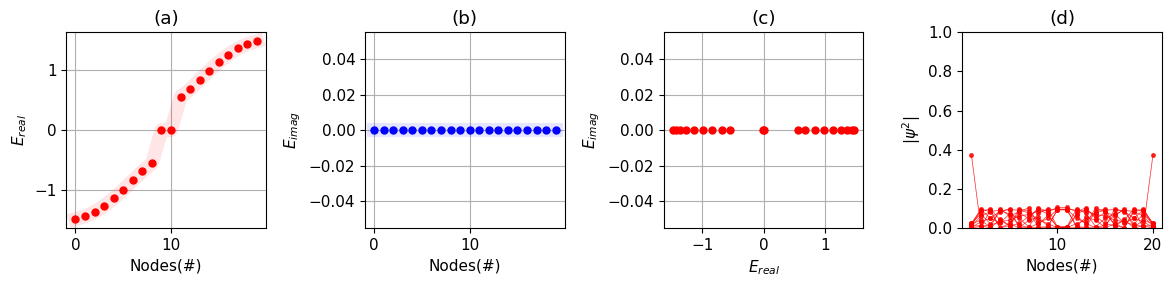

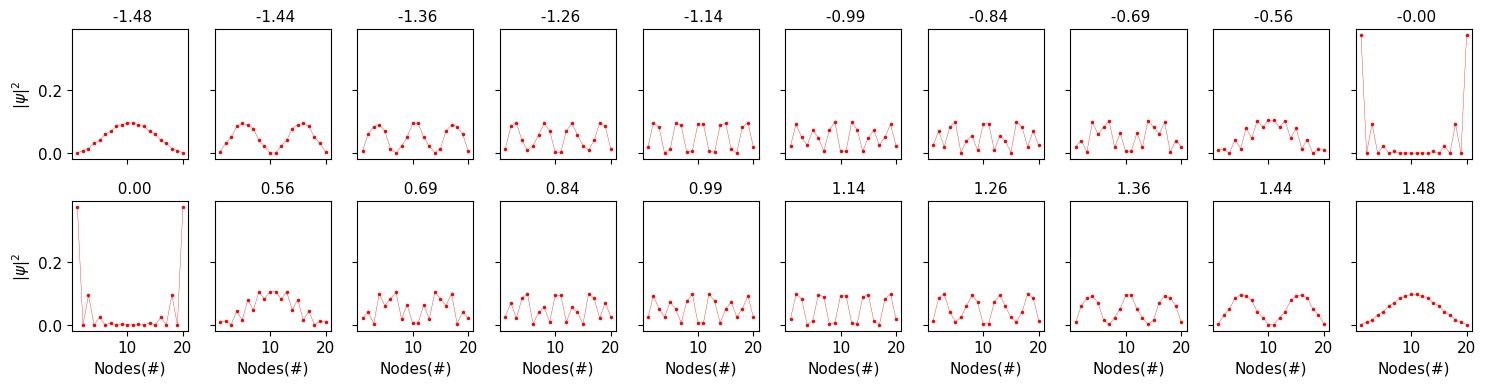

In [11]:
Nunit = 5; Nsub = 2; Nchain = 2
N = Nunit*Nsub
N_nodes = N*Nchain; nodes = np.arange(1, N_nodes+1, 1)
t1 = 0.5; t2 = 1; # t1<t2 ==> Non-trivial mode and vice versa
h1 = SSH_Hamiltonian(0.5, 1, Nunit)
h2 = SSH_Hamiltonian(0.5, 1, Nunit)
H = (
        np.kron(np.diag(np.array([1, 0])), h1)
        + np.kron(np.diag(np.array([0, 1])), h2)
    )
H[N-1, N] = -t2
H[N, N-1] = -t2
fig, ax = plt.subplots(1, 1, figsize=(10, 10)); img = sns.heatmap((H.real+H.imag), annot=True, cbar=False, annot_kws={"size": 8})# raise Exception('Abort')
# Eigen Value ans Eigen Vectors
eVal = np.zeros(N_nodes, dtype='complex'); eVec = np.zeros((N_nodes, N_nodes), dtype='complex')
eVal, eVec = np.linalg.eig(H); sorted_indexes = np.argsort(eVal.real); eVal = eVal[sorted_indexes]; eVec = eVec[:, sorted_indexes]
# Plot the results
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].plot(eVal.real, 'ro', ms=5); axs[0].plot(eVal.real, 'r-', lw=10, alpha=.1); axs[0].set_ylabel(r'$E_{real}$'); axs[0].set_xlabel('Nodes(#)'); axs[0].grid(True); axs[0].set_title('(a)')
axs[1].plot(eVal.imag, 'bo', ms=5); axs[1].plot(eVal.imag, 'b-', lw=10, alpha=.1); axs[1].set_ylabel(r'$E_{imag}$'); axs[1].set_xlabel('Nodes(#)'); axs[1].grid(True); axs[1].set_title('(b)')
axs[2].plot(eVal.real, eVal.imag, 'ro', ms=5); axs[2].set_ylabel(r'$E_{imag}$'); axs[2].set_xlabel(r'$E_{real}$'); axs[2].grid(True); axs[2].set_title('(c)')
axs[3].plot(nodes, np.abs(eVec)**2, 'r.-', lw=0.5, ms=5, alpha=0.5); axs[3].set_xlabel('Nodes(#)'); axs[3].set_ylabel(r'$|\psi^2|$'); axs[3].set_ylim([0, 1]); axs[3].set_title('(d)')
fig.tight_layout()
# Plot Eigen Vectors
ncols = 10
nrows = N_nodes // ncols
if N_nodes/ncols > nrows:
    nrows = nrows+1
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*1.5, nrows*2), sharex=True, sharey=True)
for ir in range(nrows):
    for ic in range(ncols):
        iv = ir*ncols+ic
        axs[ir, ic].plot(nodes, eVec[:, iv]**2, 'r.-', lw='0.25', ms=3)
        axs[ir, ic].set_title(' % .2f' % (eVal.real[iv]), fontsize=11)
        if ir == nrows-1:
            axs[ir, ic].set_xlabel('Nodes(#)')
        if iv >= N_nodes-1:
            break
    axs[ir, 0].set_ylabel(r'$|\psi|^2$')
fig.tight_layout()

# Two Different SSH chain coupled together

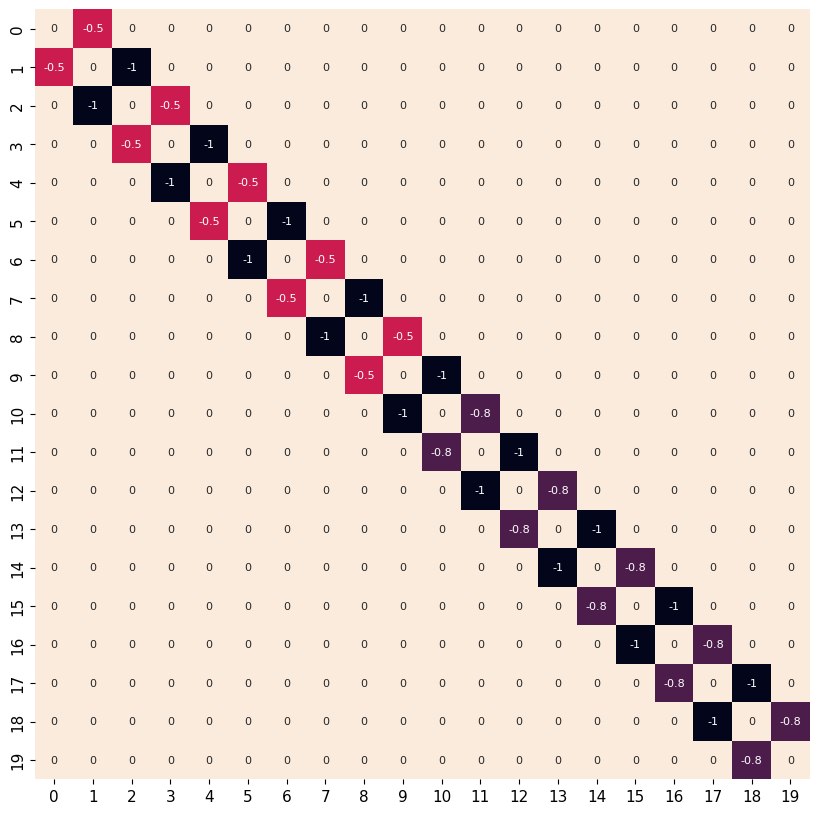

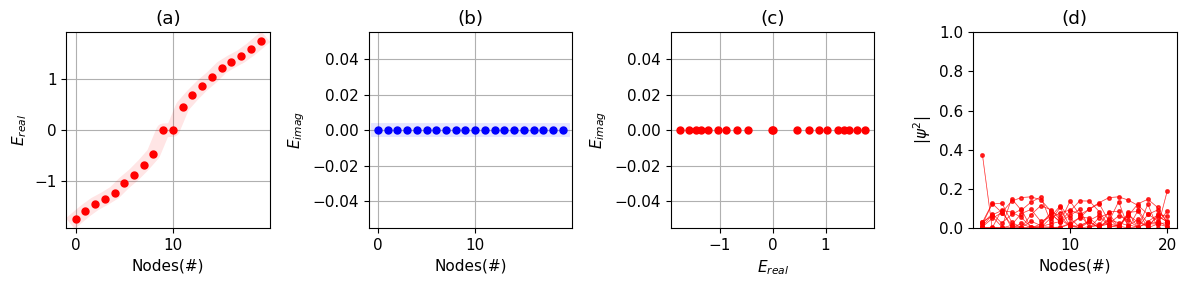

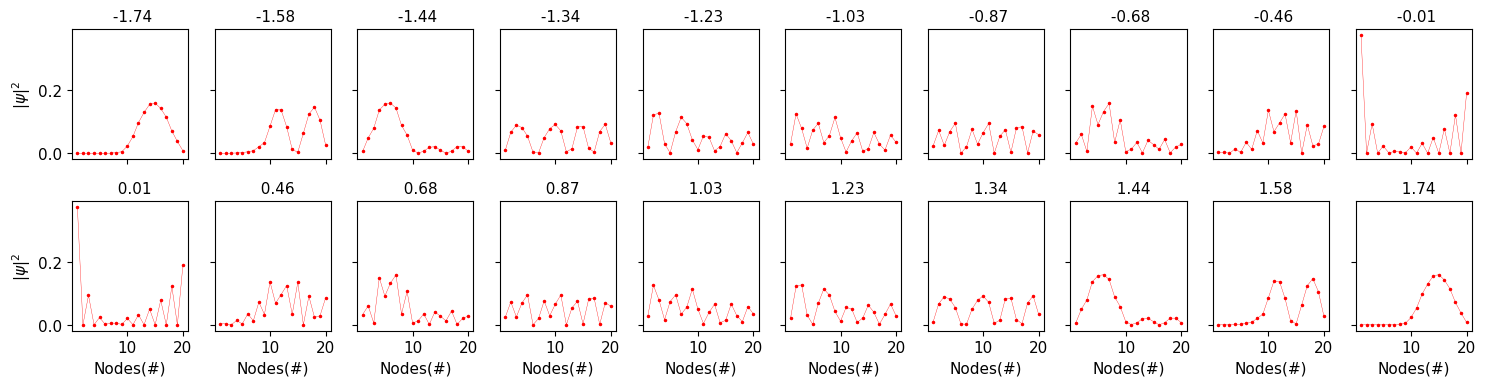

In [12]:
Nunit = 5; Nsub = 2; Nchain = 2
N = Nunit*Nsub
N_nodes = N*Nchain; nodes = np.arange(1, N_nodes+1, 1)
h1 = SSH_Hamiltonian(t1=0.5, t2=1, Nunit=Nunit)
h2 = SSH_Hamiltonian(t1=0.8, t2=1, Nunit=Nunit)
H = (
        np.kron(np.diag(np.array([1, 0])), h1)
        + np.kron(np.diag(np.array([0, 1])), h2)
    )
H[N-1, N] = -t2
H[N, N-1] = -t2
fig, ax = plt.subplots(1, 1, figsize=(10, 10)); img = sns.heatmap((H.real+H.imag), annot=True, cbar=False, annot_kws={"size": 8})# raise Exception('Abort')
# Eigen Value ans Eigen Vectors
eVal = np.zeros(N_nodes, dtype='complex'); eVec = np.zeros((N_nodes, N_nodes), dtype='complex')
eVal, eVec = np.linalg.eig(H); sorted_indexes = np.argsort(eVal.real); eVal = eVal[sorted_indexes]; eVec = eVec[:, sorted_indexes]
# Plot the results
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].plot(eVal.real, 'ro', ms=5); axs[0].plot(eVal.real, 'r-', lw=10, alpha=.1); axs[0].set_ylabel(r'$E_{real}$'); axs[0].set_xlabel('Nodes(#)'); axs[0].grid(True); axs[0].set_title('(a)')
axs[1].plot(eVal.imag, 'bo', ms=5); axs[1].plot(eVal.imag, 'b-', lw=10, alpha=.1); axs[1].set_ylabel(r'$E_{imag}$'); axs[1].set_xlabel('Nodes(#)'); axs[1].grid(True); axs[1].set_title('(b)')
axs[2].plot(eVal.real, eVal.imag, 'ro', ms=5); axs[2].set_ylabel(r'$E_{imag}$'); axs[2].set_xlabel(r'$E_{real}$'); axs[2].grid(True); axs[2].set_title('(c)')
axs[3].plot(nodes, np.abs(eVec)**2, 'r.-', lw=0.5, ms=5, alpha=0.5); axs[3].set_xlabel('Nodes(#)'); axs[3].set_ylabel(r'$|\psi^2|$'); axs[3].set_ylim([0, 1]); axs[3].set_title('(d)')
fig.tight_layout()
# Plot Eigen Vectors
ncols = 10
nrows = N_nodes // ncols
if N_nodes/ncols > nrows:
    nrows = nrows+1
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*1.5, nrows*2), sharex=True, sharey=True)
for ir in range(nrows):
    for ic in range(ncols):
        iv = ir*ncols+ic
        axs[ir, ic].plot(nodes, eVec[:, iv]**2, 'r.-', lw='0.25', ms=3)
        axs[ir, ic].set_title(' % .2f' % (eVal.real[iv]), fontsize=11)
        if ir == nrows-1:
            axs[ir, ic].set_xlabel('Nodes(#)')
        if iv >= N_nodes-1:
            break
    axs[ir, 0].set_ylabel(r'$|\psi|^2$')
fig.tight_layout()

# Five SSH chains coupled together

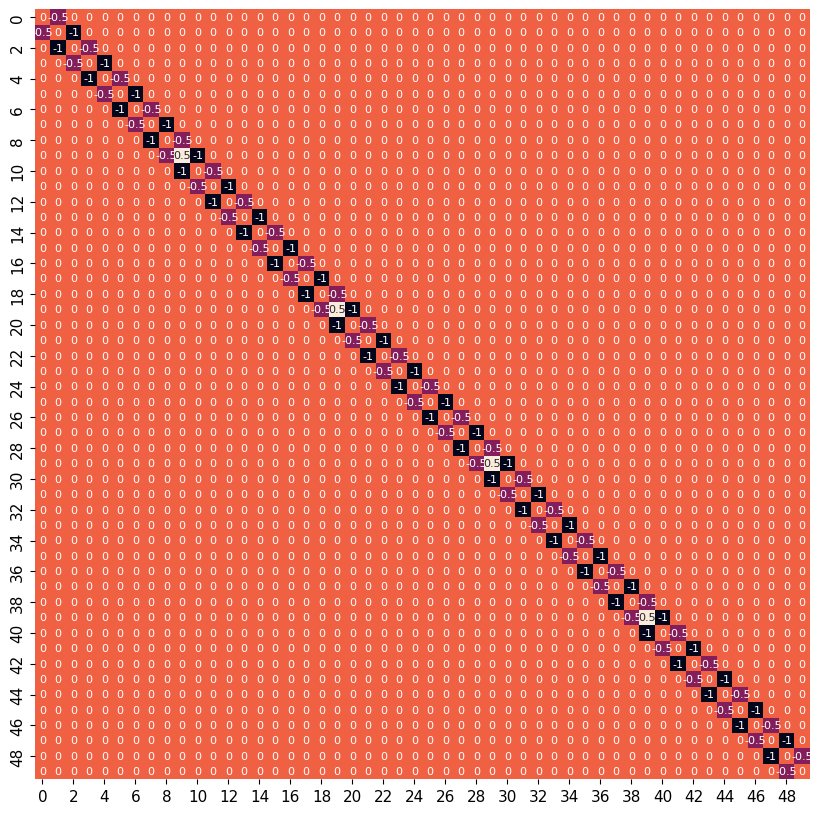

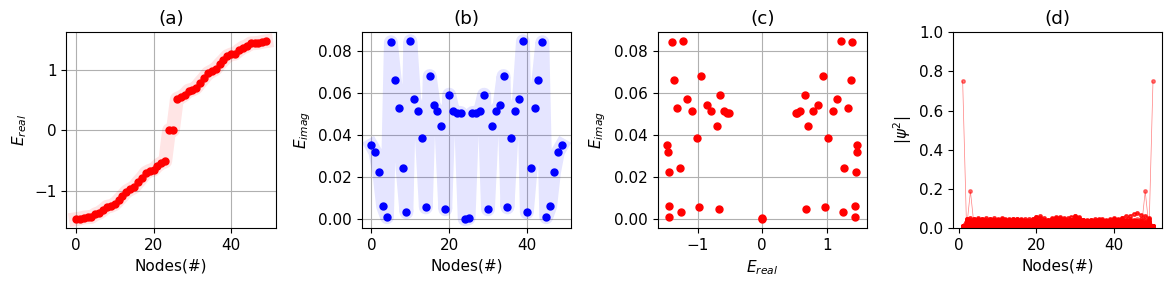

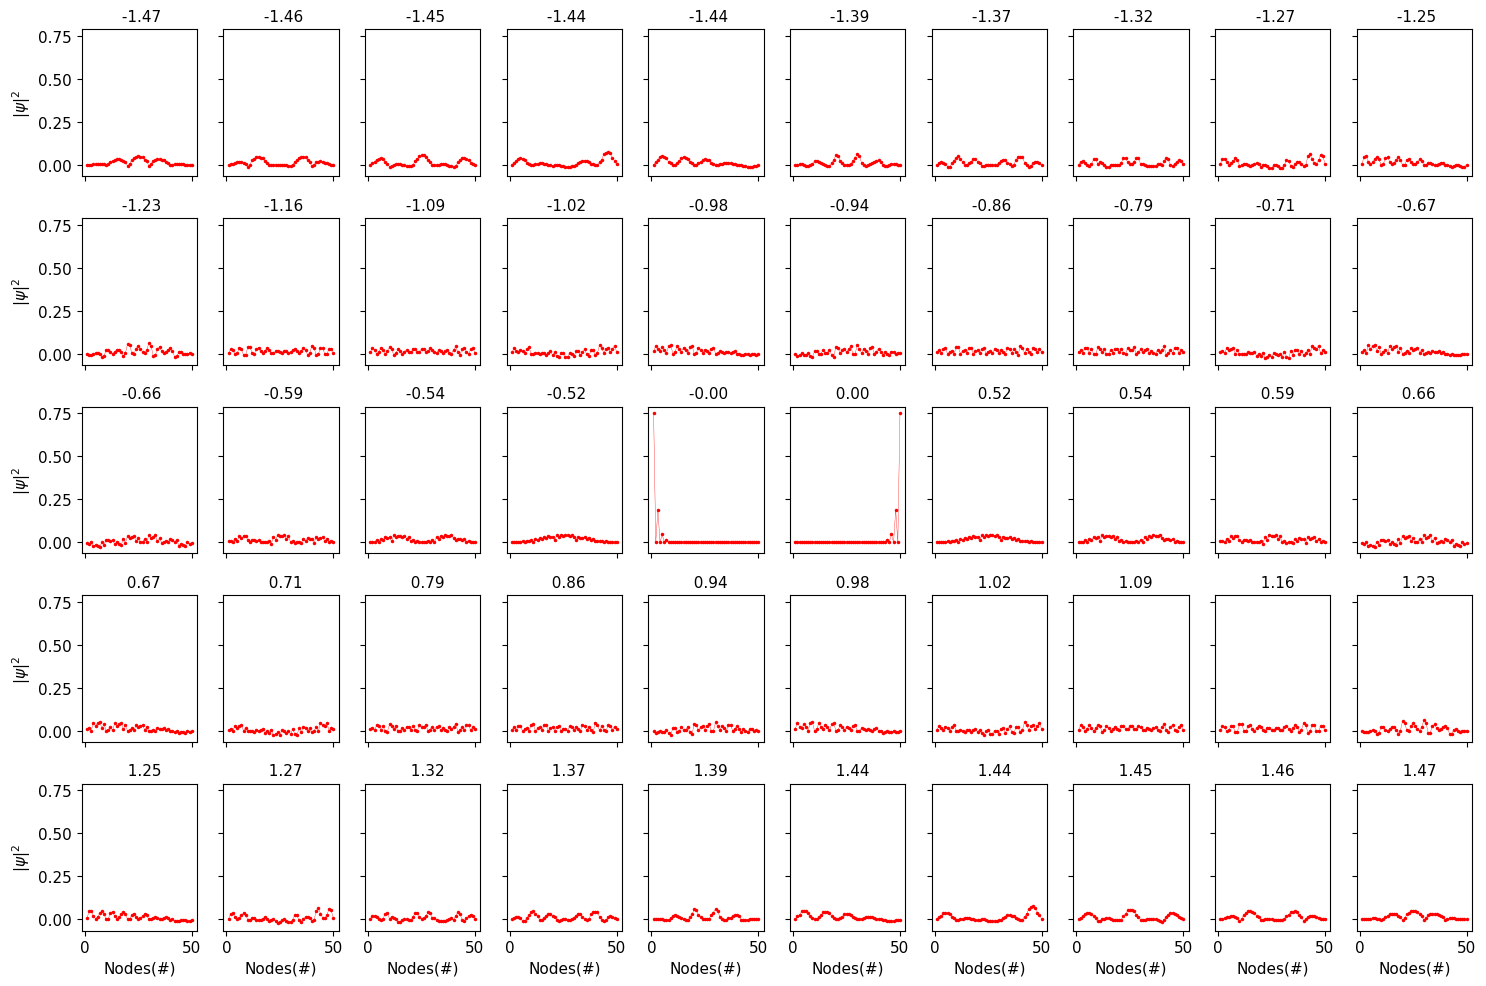

In [13]:
Nunit = 5; Nsub = 2; Nchain = 5
N = Nunit*Nsub
N_nodes = N*Nchain; nodes = np.arange(1, N_nodes+1, 1)
t1 = 0.5; t2 = 1; y = 1j*0.5
h = SSH_Hamiltonian(t1=t1, t2=t2, Nunit=Nunit) # Per SSH Hamiltonian; considered same here

H = (
        np.kron(np.diag(np.ones(Nchain)), h)
    )
for i in range(1, Nchain):
    H[i*N-1, i*N] = -t2
    H[i*N, i*N-1] = -t2
    H[i*N-1, i*N-1] = y

fig, ax = plt.subplots(1, 1, figsize=(10, 10)); img = sns.heatmap((H.real+H.imag), annot=True, cbar=False, annot_kws={"size": 8})# raise Exception('Abort')
# Eigen Value ans Eigen Vectors
eVal = np.zeros(N_nodes, dtype='complex'); eVec = np.zeros((N_nodes, N_nodes), dtype='complex')
eVal, eVec = np.linalg.eig(H); sorted_indexes = np.argsort(eVal.real); eVal = eVal[sorted_indexes]; eVec = eVec[:, sorted_indexes]
# Plot the results
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].plot(eVal.real, 'ro', ms=5); axs[0].plot(eVal.real, 'r-', lw=10, alpha=.1); axs[0].set_ylabel(r'$E_{real}$'); axs[0].set_xlabel('Nodes(#)'); axs[0].grid(True); axs[0].set_title('(a)')
axs[1].plot(eVal.imag, 'bo', ms=5); axs[1].plot(eVal.imag, 'b-', lw=10, alpha=.1); axs[1].set_ylabel(r'$E_{imag}$'); axs[1].set_xlabel('Nodes(#)'); axs[1].grid(True); axs[1].set_title('(b)')
axs[2].plot(eVal.real, eVal.imag, 'ro', ms=5); axs[2].set_ylabel(r'$E_{imag}$'); axs[2].set_xlabel(r'$E_{real}$'); axs[2].grid(True); axs[2].set_title('(c)')
axs[3].plot(nodes, np.abs(eVec)**2, 'r.-', lw=0.5, ms=5, alpha=0.5); axs[3].set_xlabel('Nodes(#)'); axs[3].set_ylabel(r'$|\psi^2|$'); axs[3].set_ylim([0, 1]); axs[3].set_title('(d)')
fig.tight_layout()
# Plot Eigen Vectors
ncols = 10
nrows = N_nodes // ncols
if N_nodes/ncols > nrows:
    nrows = nrows+1
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*1.5, nrows*2), sharex=True, sharey=True)
for ir in range(nrows):
    for ic in range(ncols):
        iv = ir*ncols+ic
        axs[ir, ic].plot(nodes, eVec[:, iv]**2, 'r.-', lw='0.25', ms=3)
        axs[ir, ic].set_title(' % .2f' % (eVal.real[iv]), fontsize=11)
        if ir == nrows-1:
            axs[ir, ic].set_xlabel('Nodes(#)')
        if iv >= N_nodes-1:
            break
    axs[ir, 0].set_ylabel(r'$|\psi|^2$')
fig.tight_layout()